In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas
data = pandas.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data", header=None)

In [25]:
import requests
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names"
text = requests.get(url).text

In [26]:
names = []
for line in text.split("\r\n"):
    if len(line) > 0:
        if (line[0] != "|" and line[0] != "1"):
            names.append(line.split(":")[0])
names.append("spam/not")

In [27]:
data.columns = names

In [28]:
features = data.iloc[:, : -2]
response = data.iloc[:, -1 ]

In [29]:
import numpy as np

In [30]:
X = features.values
Y = response.values
print(X)
print()
print(Y)

[[0.000e+00 6.400e-01 6.400e-01 ... 0.000e+00 3.756e+00 6.100e+01]
 [2.100e-01 2.800e-01 5.000e-01 ... 4.800e-02 5.114e+00 1.010e+02]
 [6.000e-02 0.000e+00 7.100e-01 ... 1.000e-02 9.821e+00 4.850e+02]
 ...
 [3.000e-01 0.000e+00 3.000e-01 ... 0.000e+00 1.404e+00 6.000e+00]
 [9.600e-01 0.000e+00 0.000e+00 ... 0.000e+00 1.147e+00 5.000e+00]
 [0.000e+00 0.000e+00 6.500e-01 ... 0.000e+00 1.250e+00 5.000e+00]]

[1 1 1 ... 0 0 0]


In [31]:
data.shape[0]

4601

In [32]:
(data.loc[data["spam/not"] == 1].shape[0]) / data.shape[0]

0.39404477287546186

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.33, random_state=42)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale
from sklearn import metrics

In [35]:
def Func(X_test, X_train, Y_train, Y_test, b, N):
    DTree = KNeighborsClassifier(n_neighbors=N)
    X_test_norm=scale(X_test)
    X_train_norm=scale(X_train)
    DTree.fit(X_train_norm, Y_train)
    Y_pred = DTree.predict(X_test_norm)
    Y_pred_proba = DTree.predict_proba(X_test_norm)[:,1] #1=spam
    print("recall = " + str(metrics.recall_score(Y_test, Y_pred)))
    print("precision = " + str(metrics.precision_score(Y_test, Y_pred)))
    print("fbeta1 = " + str(metrics.fbeta_score(Y_test, Y_pred, beta=b)))
    print("accuracy = " + str(metrics.accuracy_score(Y_test, Y_pred)))
    fprTree, tprTree, thresholdsTree = metrics.roc_curve(Y_test, Y_pred_proba)
    roc_aucTree = metrics.auc(fprTree, tprTree)
    array=[fprTree, tprTree]
    return array

In [36]:
i=1
j=10
k=100
print(str(i)+" neighbors, beta=0.5")
f_b05_i=Func(X_test, X_train, Y_train, Y_test, 0.5, i)
print()
print(str(j)+" neighbors, beta=0.5")
f_b05_j=Func(X_test, X_train, Y_train, Y_test, 0.5, j)
print()
print(str(k)+" neighbors, beta=0.5")
f_b05_k=Func(X_test, X_train, Y_train, Y_test, 0.5, k)
print()
print(str(i)+" neighbors, beta=2")
f_b2_i=Func(X_test, X_train, Y_train, Y_test, 2, i)
print()
print(str(j)+" neighbors, beta=2")
f_b2_j=Func(X_test, X_train, Y_train, Y_test, 2, j)
print()
print(str(k)+" neighbors, beta=2")
f_b2_k=Func(X_test, X_train, Y_train, Y_test, 2, k)

1 neighbors, beta=0.5
recall = 0.8672985781990521
precision = 0.8897893030794165
fbeta1 = 0.8851983231215738
accuracy = 0.8999341672152732

10 neighbors, beta=0.5
recall = 0.8009478672985783
precision = 0.9285714285714286
fbeta1 = 0.8998935037273698
accuracy = 0.89137590520079

100 neighbors, beta=0.5
recall = 0.7124802527646129
precision = 0.9185336048879837
fbeta1 = 0.8683095879861378
accuracy = 0.8538512179065174

1 neighbors, beta=2
recall = 0.8672985781990521
precision = 0.8897893030794165
fbeta1 = 0.8717053032708797
accuracy = 0.8999341672152732

10 neighbors, beta=2
recall = 0.8009478672985783
precision = 0.9285714285714286
fbeta1 = 0.8235867446393763
accuracy = 0.89137590520079

100 neighbors, beta=2
recall = 0.7124802527646129
precision = 0.9185336048879837
fbeta1 = 0.7459477340390339
accuracy = 0.8538512179065174


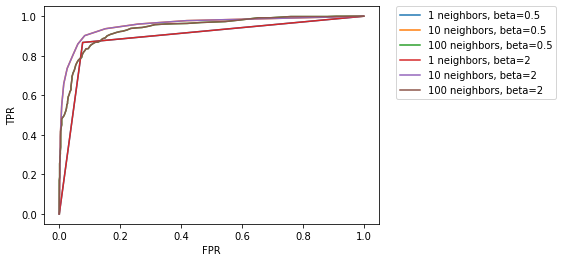

In [37]:
plt.plot(f_b05_i[0], f_b05_i[1], label=str(i)+" neighbors, beta=0.5")
plt.plot(f_b05_j[0], f_b05_j[1], label=str(j)+ " neighbors, beta=0.5")
plt.plot(f_b05_k[0], f_b05_k[1], label=str(k)+" neighbors, beta=0.5")
plt.plot(f_b2_i[0], f_b2_i[1], label=str(i)+" neighbors, beta=2")
plt.plot(f_b2_j[0], f_b2_j[1], label=str(j)+" neighbors, beta=2")
plt.plot(f_b2_k[0], f_b2_k[1], label=str(k)+" neighbors, beta=2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [38]:
from sklearn.model_selection import GridSearchCV
Dtree = KNeighborsClassifier()
turned_parametersTree=[{"n_neighbors": np.arange(1,50), 
                        "p":[1,2], 
                        "weights":["uniform","distance"]}]
gstree=GridSearchCV(Dtree, turned_parametersTree)

In [39]:
gstree.fit(X_train, Y_train)

C:\Users\MI\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid=[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                          'p': [1, 2], 'weights': ['uniform', 'distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [40]:
gstree.best_params_

{'n_neighbors': 6, 'p': 1, 'weights': 'distance'}